<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab, you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
sacramento = pd.read_csv("datasets/sacramento_real_estate_transactions.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. **Report any notable findings.**

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [8]:
sacramento.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [10]:
sacramento.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [12]:
sacramento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [15]:
sacramento.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [17]:
#Clerning Convert 'sale_date' to datetime
sacramento['sale_date'] = pd.to_datetime(sacramento['sale_date'])
sacramento

/Users/atigun/anaconda3/lib/python3.11/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,2008-05-15,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,2008-05-15,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,2008-05-15,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,2008-05-15,235301,38.417000,-121.397424


In [19]:
# filter DataFrame in colums 'sq__ft' , 'baths' , 'beds' == 0 and remove row in DataFrame
sacramento = sacramento[~((sacramento['sq__ft']==0) & (sacramento['baths']==0) & (sacramento['beds']==0))]

In [21]:
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,2008-05-15,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,2008-05-15,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,2008-05-15,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,2008-05-15,235301,38.417000,-121.397424


In [23]:
#Filter values in DataFrame 'sq__ft' found 'sq__ft' negative values is imposible and drop row
sacramento.sort_values(by=['sq__ft'], ascending=True)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,2008-05-16,-210944,-121.503471,38.668433
302,5924 TANUS CIR,ROCKLIN,95677,CA,4,2,0,Residential,2008-05-20,380000,38.778691,-121.204292
865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,2008-05-16,1551,38.851645,-121.231742
707,2733 YUMA CT,CAMERON PARK,95682,CA,2,2,0,Residential,2008-05-16,215000,38.691215,-120.994949
704,140 VENTO CT,ROSEVILLE,95678,CA,3,2,0,Condo,2008-05-16,212500,38.793533,-121.289685
...,...,...,...,...,...,...,...,...,...,...,...,...
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992,Residential,2008-05-20,460000,38.403609,-121.335541
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5,3,4246,Residential,2008-05-19,452000,38.628955,-121.529269
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4,4,4303,Residential,2008-05-19,450000,38.399436,-121.444041
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,2008-05-16,884790,38.415298,-121.194858


In [25]:
#Remove values in DataFrame 'sq__ft' 
sacramento = sacramento[sacramento['sq__ft'] > 0]
sacramento.sort_values(by=['sq__ft'], ascending=True)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484,Condo,2008-05-19,48000,38.582279,-121.401482
292,5411 10TH AVE,SACRAMENTO,95820,CA,2,1,539,Residential,2008-05-20,334000,38.542727,-121.442449
18,250 PERALTA AVE,SACRAMENTO,95833,CA,2,1,588,Residential,2008-05-21,120000,38.612099,-121.469095
168,5028 14TH AVE,SACRAMENTO,95820,CA,2,1,610,Residential,2008-05-20,93675,38.539420,-121.446894
868,9127 NEWHALL DR Unit 34,SACRAMENTO,95826,CA,1,1,611,Condo,2008-05-15,60000,38.542419,-121.359904
...,...,...,...,...,...,...,...,...,...,...,...,...
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992,Residential,2008-05-20,460000,38.403609,-121.335541
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5,3,4246,Residential,2008-05-19,452000,38.628955,-121.529269
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4,4,4303,Residential,2008-05-19,450000,38.399436,-121.444041
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,2008-05-16,884790,38.415298,-121.194858


In [27]:
#Filter values in DataFrame 'price' found 'price' is impossible value compare 'sq__ft' 
sacramento.sort_values(by=['price'], ascending=True)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,2008-05-16,2000,38.490447,-121.129337
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166,Residential,2008-05-16,30000,38.715322,-121.314787
335,5840 WALERGA RD,SACRAMENTO,95842,CA,2,1,840,Condo,2008-05-19,40000,38.673678,-121.357471
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484,Condo,2008-05-19,48000,38.582279,-121.401482
605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838,Residential,2008-05-16,55422,38.471646,-121.435158
...,...,...,...,...,...,...,...,...,...,...,...,...
552,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,2008-05-19,691659,38.413535,-121.188211
333,1409 47TH ST,SACRAMENTO,95819,CA,5,2,2484,Residential,2008-05-20,699000,38.563244,-121.446876
553,6222 CALLE MONTALVO CIR,GRANITE BAY,95746,CA,5,3,3670,Residential,2008-05-19,760000,38.779435,-121.146676
334,3935 EL MONTE DR,LOOMIS,95650,CA,4,4,1624,Residential,2008-05-20,839000,38.813337,-121.133348


In [29]:
#Remove values in DataFrame 'sq__ft' != 5822, 1 row
sacramento = sacramento[sacramento['sq__ft'] != 5822]
sacramento.sort_values(by=['price'], ascending=True)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166,Residential,2008-05-16,30000,38.715322,-121.314787
335,5840 WALERGA RD,SACRAMENTO,95842,CA,2,1,840,Condo,2008-05-19,40000,38.673678,-121.357471
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484,Condo,2008-05-19,48000,38.582279,-121.401482
605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838,Residential,2008-05-16,55422,38.471646,-121.435158
867,7401 TOULON LN,SACRAMENTO,95828,CA,4,2,1512,Residential,2008-05-15,56950,38.488628,-121.387759
...,...,...,...,...,...,...,...,...,...,...,...,...
552,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,2008-05-19,691659,38.413535,-121.188211
333,1409 47TH ST,SACRAMENTO,95819,CA,5,2,2484,Residential,2008-05-20,699000,38.563244,-121.446876
553,6222 CALLE MONTALVO CIR,GRANITE BAY,95746,CA,5,3,3670,Residential,2008-05-19,760000,38.779435,-121.146676
334,3935 EL MONTE DR,LOOMIS,95650,CA,4,4,1624,Residential,2008-05-20,839000,38.813337,-121.133348


In [31]:
sacramento.sort_values(by=['beds'], ascending=False)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
108,2912 NORCADE CIR,SACRAMENTO,95826,CA,8,4,3612,Multi-Family,2008-05-21,282400,38.559505,-121.364839
648,8198 STEVENSON AVE,SACRAMENTO,95828,CA,6,4,2475,Multi-Family,2008-05-16,159900,38.465271,-121.404260
779,9452 RED SPRUCE WAY,ELK GROVE,95624,CA,6,3,2555,Residential,2008-05-16,300000,38.404505,-121.346938
97,5529 LAGUNA PARK DR,ELK GROVE,95758,CA,5,3,2790,Residential,2008-05-21,258000,38.425680,-121.438062
860,8432 BRIGGS DR,ROSEVILLE,95747,CA,5,3,3579,Residential,2008-05-16,610000,38.788610,-121.339495
...,...,...,...,...,...,...,...,...,...,...,...,...
171,5201 LAGUNA OAKS DR Unit 199,ELK GROVE,95758,CA,1,1,722,Condo,2008-05-20,98000,38.423251,-121.444489
868,9127 NEWHALL DR Unit 34,SACRAMENTO,95826,CA,1,1,611,Condo,2008-05-15,60000,38.542419,-121.359904
173,5201 LAGUNA OAKS DR Unit 172,ELK GROVE,95758,CA,1,1,722,Condo,2008-05-20,100000,38.423251,-121.444489
622,4800 WESTLAKE PKWY Unit 410,SACRAMENTO,95835,CA,1,1,846,Condo,2008-05-16,115000,38.658812,-121.542345


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR (Simple Linear Regression) model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

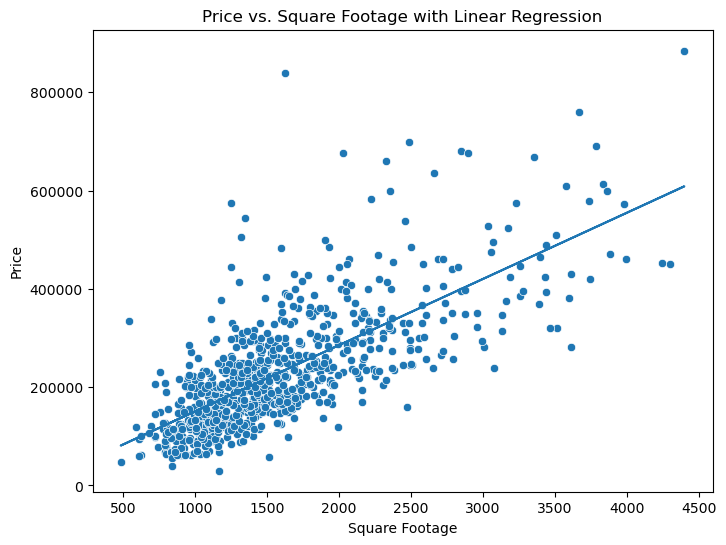

Intercept: 15943.749961489142
Coefficient: 134.75120754188828


In [35]:
# Create a linear regression model
X = sacramento[['sq__ft']] 
y = sacramento['price']
model = LinearRegression()
model.fit(X, y)

# Plot the scatter plot and the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sq__ft', y='price', data=sacramento)
plt.plot(X, model.predict(X))  # Plot the regression line
plt.title('Price vs. Square Footage with Linear Regression')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

# You can also print the coefficients and intercept of the model
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

/Users/atigun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


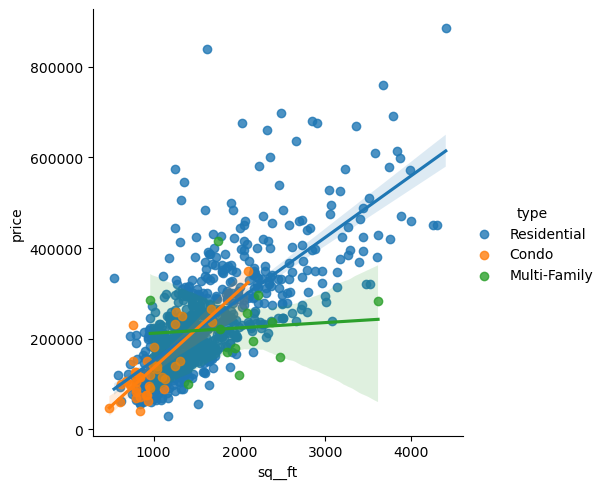

In [38]:
sns.lmplot(x='sq__ft',y='price', data=sacramento, hue='type')

In [40]:
sacramento.describe()

,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude
count,812.000000,812.000000,812.00000,812.000000,812,812.000000,812.000000,812.000000
mean,95761.497537,3.247537,1.95936,1586.683498,2008-05-18 05:05:01.477832448,229751.267241,38.577038,-121.378840
min,95603.000000,1.000000,1.00000,484.000000,2008-05-15 00:00:00,30000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.00000,1144.000000,2008-05-16 00:00:00,148750.000000,38.473804,-121.451463
50%,95820.000000,3.000000,2.00000,1418.500000,2008-05-19 00:00:00,207986.500000,38.591720,-121.405456
75%,95828.000000,4.000000,2.00000,1851.000000,2008-05-20 00:00:00,285000.000000,38.675024,-121.326073
max,95864.000000,8.000000,5.00000,4400.000000,2008-05-21 00:00:00,884790.000000,39.008159,-120.597599
std,85.365689,0.849490,0.66594,647.477210,NaN,119704.946884,0.126393,0.119483


### 4. Which variable would be the best predictor of `y` in an SLR (Simple Linear Regression) model? Why?

### 5. Write a function that will take in two lists, `x` and `y`, and returns the intercept and slope coefficients that minimize SSE (Sum of Squared Errors). 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Question #4.**
- **Report the slope and intercept.**

In [80]:
def lin_reg(x, y):  
    X_bar = X.mean()
    y_bar = y.mean()
    X_std = X.std()
    y_std = y.std()
    r_xy = df[['sq__ft', 'price']].corr().iloc[0, 1]  
    b1 = r_xy * y_std / X_std
    b0 = y_bar - (b1 * X_bar)
    return b0,b1

lin_reg(X,y)

(sq__ft                15943.749961
 beds                -103792.474421
 beds                -103792.474421
 type_Residential     -96932.298672
 type_Multi-Family    218629.140210
 type_Condo           209643.941949
 dtype: float64,
 sq__ft                  134.751208
 beds                 102706.681164
 beds                 102706.681164
 type_Residential     349956.537627
 type_Multi-Family    694705.165360
 type_Condo           398223.125302
 dtype: float64)

In [94]:
#Create function for value beta_1, beta_0
def calculate_slope_intercept(x, y):      # Find the value means of x and y
    X_mean = np.mean(x)  
    y_mean = np.mean(y)    
    X_std = np.std(x)  # Find the value standard deviations of x and y
    y_std = np.std(y)
    
    r_xy = np.corrcoef(x, y)[0, 1] # Find the value correlation between x and y and extract the correlation coefficient
    
    beta_1 = r_xy * (y_std / X_std) # Find the value the slope (beta_1)
    beta_0 = y_mean - beta_1 * X_mean # Find the value the intercept (beta_0)
    return beta_1, beta_0

# Test the function using 'sq__ft' and 'price'
x = sacramento['sq__ft']
y = sacramento['price']

slope, intercept = calculate_slope_intercept(x, y)
slope, intercept

(134.75120754188816, 15943.749961489317)

### 6. Now interpret the intercept and the slope.

** Intercept (15943.75): This is the estimated price of a property with zero square footage. While it doesn't make sense in a real-world scenario to have a property with zero square footage, mathematically, this value represents the baseline price when the area is zero. In this case, the model estimates the price would start at around $15,943.

** Slope (134.75): This value indicates the rate at which the price increases for each additional square foot of property. For every additional square foot, the price of the property is expected to increase by approximately $134.75. This is a measure of the linear relationship between property size and price.


### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

prediction: It can be inferred that for every additional square foot, the property price increases by approximately $134.75. 

Inference: The model can also be used for inference to understand the relationship between square footage and price.

### 8: Using the model you came up with in Question #5, calculate and plot the residuals.

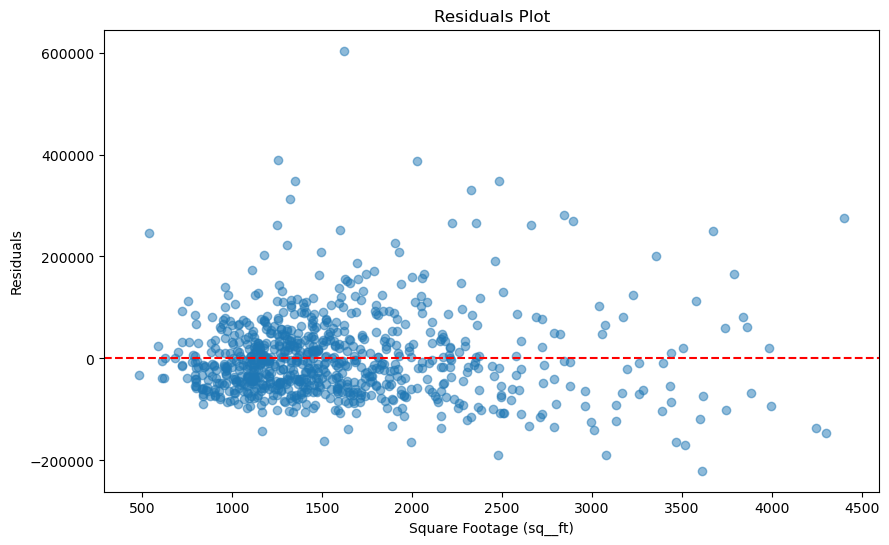

In [99]:
# Calculate predicted values
y_pred = slope * x + intercept

# Calculate residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Square Footage (sq__ft)')
plt.ylabel('Residuals')
plt.show()

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [45]:
sacramento_type_dummies = pd.get_dummies(sacramento['type'], prefix='type')
sacramento = pd.concat([sacramento, sacramento_type_dummies], axis=1)
sacramento.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,False,False,True
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,False,False,True
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,False,False,True
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,False,False,True
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,False,False,True


### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [47]:
sacramento.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,False,False,True
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,False,False,True
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,False,False,True
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,False,False,True
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,False,False,True


### 11. Build what you think may be the best MLR (Multiple Linear Regression) model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [57]:
# Choose 'sq__ft', 'beds', and 'type_Residential' as predictor variables.
X = sacramento[['sq__ft','beds', 'beds', 'type_Residential','type_Multi-Family','type_Condo']]
y = sacramento['price']

# Create and train the linear regression model.
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept.
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Make predictions on the training data.
y_pred = model.predict(X)

# Evaluate the model.
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('R-squared:', metrics.r2_score(y, y_pred))

Coefficients: [   156.40987246 -12539.00593401 -12539.00593401  29143.17459364
 -20323.46844304  -8819.7061506 ]
36585.697837651416
Intercept: 36585.697837651416
Mean Squared Error: 6426010991.282573
R-squared: 0.5509936918325551


In [70]:
model.coef_

array([   156.40987246, -12539.00593401, -12539.00593401,  29143.17459364,
       -20323.46844304,  -8819.7061506 ])

### 12. Plot the true price vs the predicted price to evaluate your MLR (Multiple Linear Regression) visually.

You can use matplotlib or seaborn.

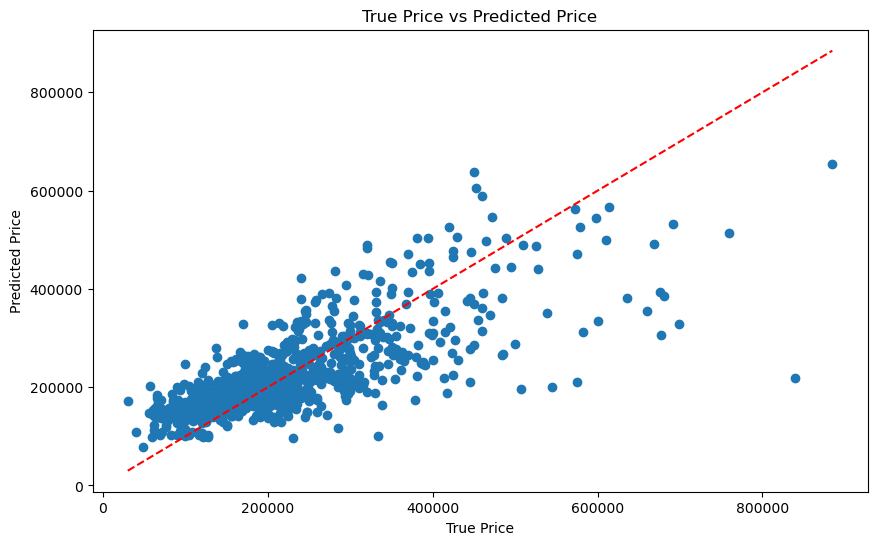

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("True Price vs Predicted Price")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.show()

### 13. List the five assumptions for an MLR (Multiple Linear Regression) model. 

Indicate which ones are the same as the assumptions for an SLR model. 


1.	Linearity:
o	The relationship between each predictor (such as sq__ft, beds, baths, and dummy variables for type) and the dependent variable (price) should be linear.
o	Testing this assumption: We can check this by plotting the predictors against the residuals. If there’s no obvious pattern, the linearity assumption holds.
2.	Independence:
o	The residuals (errors) should be independent, meaning there’s no correlation between them.
o	Testing this assumption: In time-series data, this can be tested using the Durbin-Watson test, but since this dataset is not time-series, we assume independence based on the dataset structure.
3.	Homoscedasticity:
o	The variance of the residuals should be constant for all predicted values of the dependent variable.
o	Testing this assumption: You can plot residuals vs. predicted values. If the spread of residuals is consistent (no funnel shape or pattern), the assumption holds.
4.	No Multicollinearity (MLR-specific):
o	In MLR, the independent variables should not be highly correlated with each other (multicollinearity should be low).
o	Testing this assumption: You can check the Variance Inflation Factor (VIF) for each variable. If VIF is above 5 or 10, multicollinearity might be an issue.
o	This assumption is specific to MLR and not relevant for SLR, which only has one predictor.
5.	Normality of Residuals:
o	The residuals should follow a normal distribution.
o	Testing this assumption: You can create a Q-Q plot or histogram of the residuals to check if they are normally distributed.


### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

Linearity Assumption: Based on the scatter plots the relationships between variables such as square footage (sq__ft) and price appear to be fairly linear. This suggests that the linearity assumption is likely met for this mode.

Homoscedasticity Assumption: model does not seem to suffer from problematic multicollinearity between the predictors (sq__ft, beds, baths). Therefore, the predictors in the model can remain as they are without causing instability or inflated standard errors.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [105]:
import statsmodels.api as sm 
# Prepare the data for the model
X = sm.add_constant(x)  # Add constant term for intercept
model = sm.OLS(y, X).fit()  # Fit the OLS model

# Extract the summary information
sum_df = pd.DataFrame({'Point Estimate': model.params, 'Standard Error': model.bse,'t-score': model.tvalues,
                           'p-value': model.pvalues,
                           '95% Confidence Interval Lower': model.conf_int()[0],
                           '95% Confidence Interval Upper': model.conf_int()[1]})

sum_df

,Point Estimate,Standard Error,t-score,p-value,95% Confidence Interval Lower,95% Confidence Interval Upper
const,15943.749961,7621.125457,2.092047,3.674514e-02,984.265504,30903.234419
sq__ft,134.751208,4.447549,30.297857,2.087958e-135,126.021127,143.481288


### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [109]:
## As a function and if splitting data...
def r2_adj(y, y_pred, p):
    n = len(y)
    y_mean = np.mean(y)
    numerator = np.sum(np.square(y - y_pred)) / (n - p - 1)
    denominator = np.sum(np.square(y - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [111]:
metrics.r2_score(y, y_pred)

0.5312391921867458

In [119]:
# R2: The R2 of the model
# n: the number of observations
# k: the number of features or predictors variables or values in X

features = [['sq__ft','beds', 'beds', 'type_Residential','type_Multi-Family','type_Condo']]
adj_r = round(1 - (1-metrics.r2_score(y, y_pred))*(len(y)-1)/(len(y)-len(features)-1), 3)

adj_r

0.531

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [131]:
from sklearn.metrics import mean_squared_error, r2_score # Import functions

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred) # Now 'mean_squared_error' is defined and accessible

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y, y_pred)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 6708730030.062577
Root Mean Squared Error (RMSE): 81906.83750495179
R-squared (R²): 0.5312391921867458


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [136]:
# remove 'beds' from the original model, for example
X_multi = sacramento[['sq__ft', 'beds', 'baths']]
X_adjusted = X_multi.drop(columns=['beds'])

# Train a new model
model_adjusted = LinearRegression()
model_adjusted.fit(X_adjusted, y)

# Make predictions with the new model
y_pred_adjusted = model_adjusted.predict(X_adjusted)

# Calculate regression metrics for the new model
mse_adjusted = mean_squared_error(y, y_pred_adjusted)
rmse_adjusted = np.sqrt(mse_adjusted)
r2_adjusted = r2_score(y, y_pred_adjusted)

# show the metrics
print(f"Adjusted Model Mean Squared Error (MSE): {mse_adjusted}")
print(f"Adjusted Model Root Mean Squared Error (RMSE): {rmse_adjusted}")
print(f"Adjusted Model R-squared (R²): {r2_adjusted}")

Adjusted Model Mean Squared Error (MSE): 6703358408.548392
Adjusted Model Root Mean Squared Error (RMSE): 81874.03989390284
Adjusted Model R-squared (R²): 0.5316145248695296


### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

In [146]:
#Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_adjusted, y, test_size=0.2, random_state=42)

# Train the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE, RMSE, and R² for both training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the metrics
print(f"Training MSE: {mse_train}, Training RMSE: {rmse_train}, Training R²: {r2_train}")
print(f"Testing MSE: {mse_test}, Testing RMSE: {rmse_test}, Testing R²: {r2_test}")

Training MSE: 6967036775.128247, Training RMSE: 83468.77724711347, Training R²: 0.5225737181727064
Testing MSE: 5686030673.84156, Testing RMSE: 75405.77347817314, Testing R²: 0.5671658278433067


Conclusion:
Your model is in a moderate bias situation. It's not highly biased, but there is some underfitting because the model is not capturing enough complexity in the data. However, it doesn’t have high variance either, as the training and testing errors are close. It might be slightly leaning towards high bias, but overall, it is close to the sweet spot.